In [1]:
import numpy as np
import matplotlib.pyplot as plt
from metropolis import init, calc_energy, gen_neigh, get_expos, mc_step
from copy import deepcopy

# %matplotlib widget
plt.rcParams["figure.figsize"] = [7, 4]


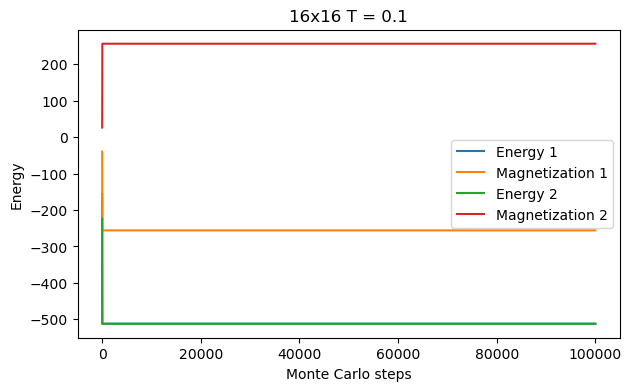

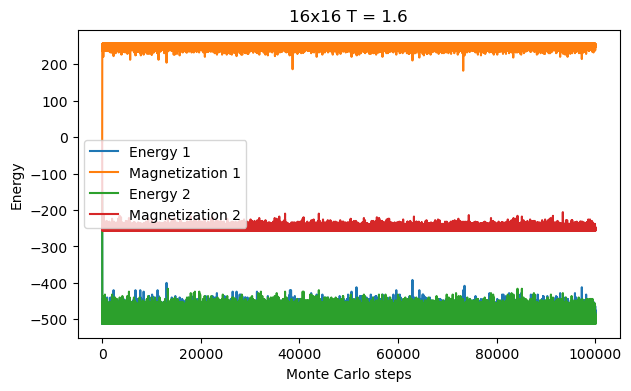

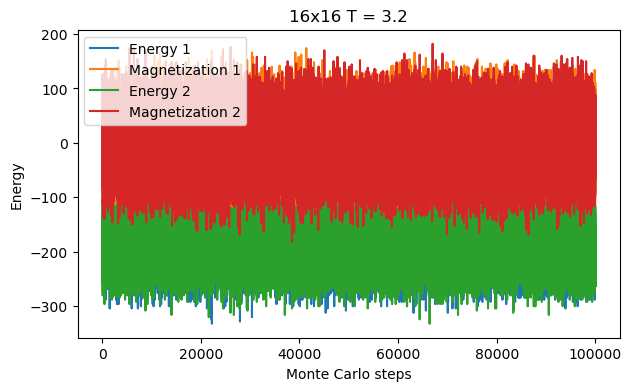

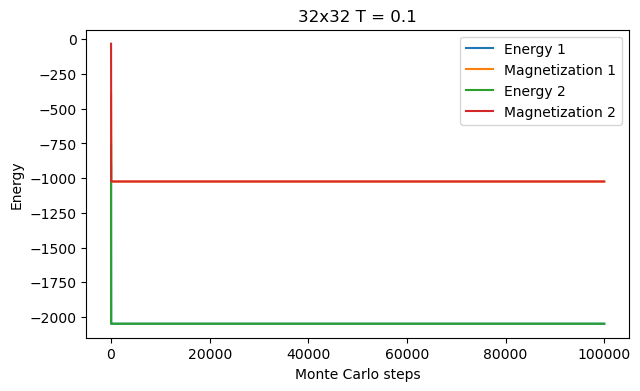

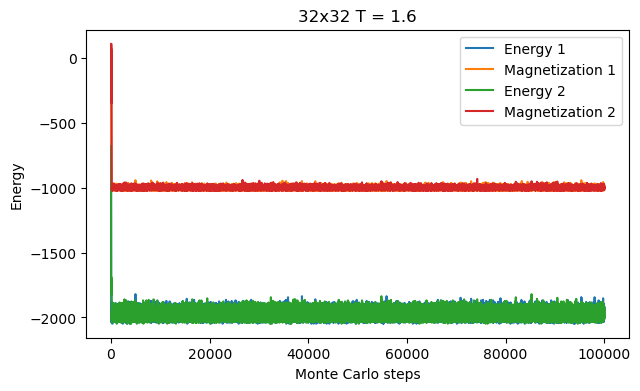

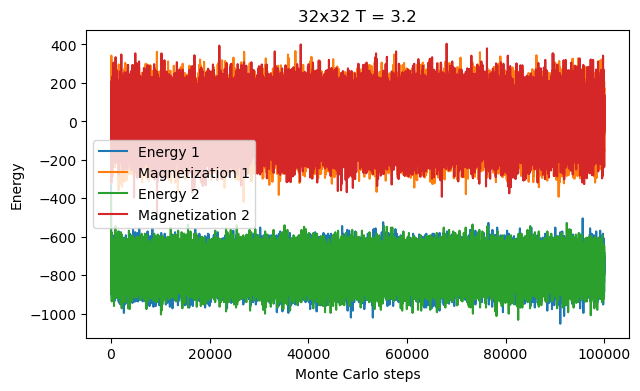

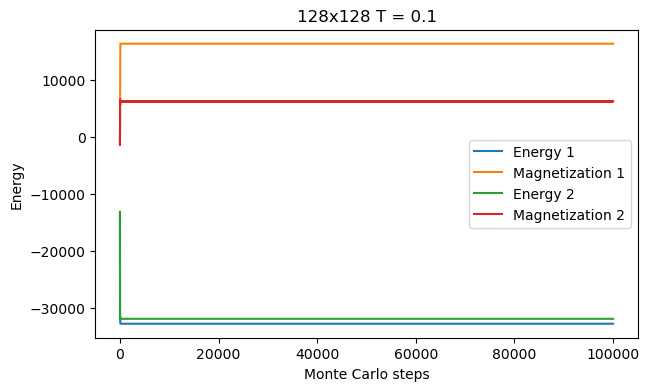

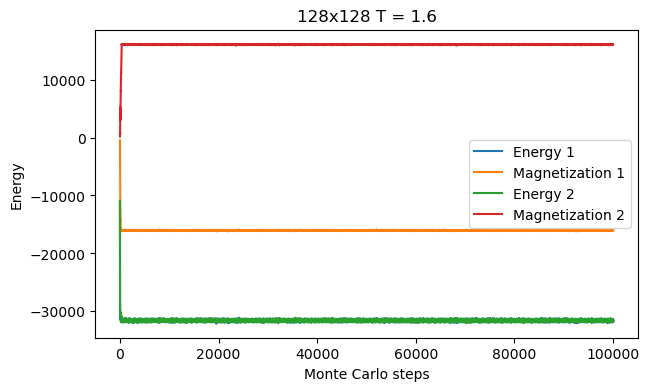

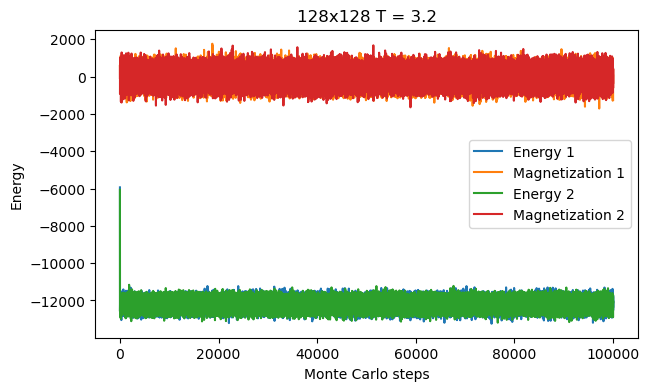

In [2]:
net_sizes = [16, 32, 128]
temperatures = [0.1, 1.6, 3.2]

steps = []

for L in net_sizes:
    N = L**2

    for T in temperatures:
        neigh = gen_neigh(L)
        expos = get_expos(T)

        fig, ax = plt.subplots()
        ax.set_xlabel("Monte Carlo steps")
        ax.set_ylabel("Energy")

        for i in range(2):
            spins = init(N)
            energy, mag = calc_energy(spins, neigh)

            energies = []
            mags = []

            for _ in range(100000):
                spins, energy, mag = mc_step(spins, energy, mag, neigh, expos)

                energies.append(energy)
                mags.append(mag)

            ax.set_title(f"{L}x{L} T = {T}")
            ax.plot(energies, label=f"Energy {i + 1}")
            ax.plot(mags, label=f"Magnetization {i + 1}")

            ax.legend()

        plt.show()
